# Projet Interpromo 2021 : Groupe Identification et scrapping de nouvelles sources

## Travail préparatoire

### PARTIE I : Manipulation des Dataframes

### Comment découper le travail préparatoire ? 

###### une partie sur l'architecture HTML simple  
    - reprérer des éléments sur cette page (significations des balises) 
    
###### apprendre des librairies Python 
    - Pandas 
    - numpy
    - re 
    - nltk 
    
###### Apprendre à scrapper 
Donner une page standard   
    - beautifulSoup ? 
    - un truc sur un scrapeur au moins
    


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
from sklearn import datasets

Avant de commencer ce TP, je vous conseille vivement de consulter ce site : http://python-simple.com/python-pandas/creation-dataframes.php

### 1. Création d'un DataFrame

Pour cet exemple, on va utiliser le dataset Iris de Python.

In [204]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

On crée notre DataFrame à partir des données numériques de l'array 'data' en indiquant le nom des colonnes correspondantes.

In [215]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head() # renvoie les n premières lignes du DataFrame, on peut spécifier n dans les parenthèses (5 par défaut)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


On peut également renommer les colonnes :

In [216]:
df.columns = ['sepal length', 'sepal width', 'petal length' ,'petal width']
df.tail() # renvoie les n dernières lignes du DataFrame, on peut spécifier n dans les parenthèses (5 par défaut)

,sepal length,sepal width,petal length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Une fois le DataFrame crée, il est possible de rajouter des colonnes à posteriori :

In [217]:
df['species'] = iris['target']
df.iloc[np.random.choice(df.index, 10)] # renvoie les lignes correspondantes à 10 index tirés aléatoirement

,sepal length,sepal width,petal length,petal width,species
98,5.1,2.5,3.0,1.1,1
119,6.0,2.2,5.0,1.5,2
106,4.9,2.5,4.5,1.7,2
135,7.7,3.0,6.1,2.3,2
3,4.6,3.1,1.5,0.2,0
33,5.5,4.2,1.4,0.2,0
127,6.1,3.0,4.9,1.8,2
126,6.2,2.8,4.8,1.8,2
7,5.0,3.4,1.5,0.2,0
111,6.4,2.7,5.3,1.9,2


On associe les libellés correspondant aux 3 espèces :
- 0 pour setosa
- 1 pour versicolor
- 2 pour virginica

In [218]:
df['class'] = df['species'].copy()
df.loc[df['species'] == 0, 'class'] = 'setosa'
df.loc[df['species'] == 1, 'class'] = 'versicolor'
df.loc[df['species'] == 2, 'class'] = 'virginica'

df.iloc[np.random.choice(df.index, 10)]

,sepal length,sepal width,petal length,petal width,species,class
127,6.1,3.0,4.9,1.8,2,virginica
82,5.8,2.7,3.9,1.2,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
142,5.8,2.7,5.1,1.9,2,virginica
59,5.2,2.7,3.9,1.4,1,versicolor
79,5.7,2.6,3.5,1.0,1,versicolor
63,6.1,2.9,4.7,1.4,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor
64,5.6,2.9,3.6,1.3,1,versicolor


### 2. Fonction sur les dataframes

Ces quelques exemples ne sont pas exhaustifs, vous en rencontrerez beaucoup d'autres au cours du projet.

Les fonctions classiques sont intégrées sous numpy, mais vous pouvez aussi implémenter votre propre fonction avec un df.apply( lambda x : f(x) )

In [219]:
df.iloc[:,0:4].mean() # Moyenne sur les 4 premières colonnes

sepal length    5.843333
sepal width     3.057333
petal length    3.758000
petal width     1.199333
dtype: float64

Boxplot des caractéristiques en faisant un GROUP BY par espèce :

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

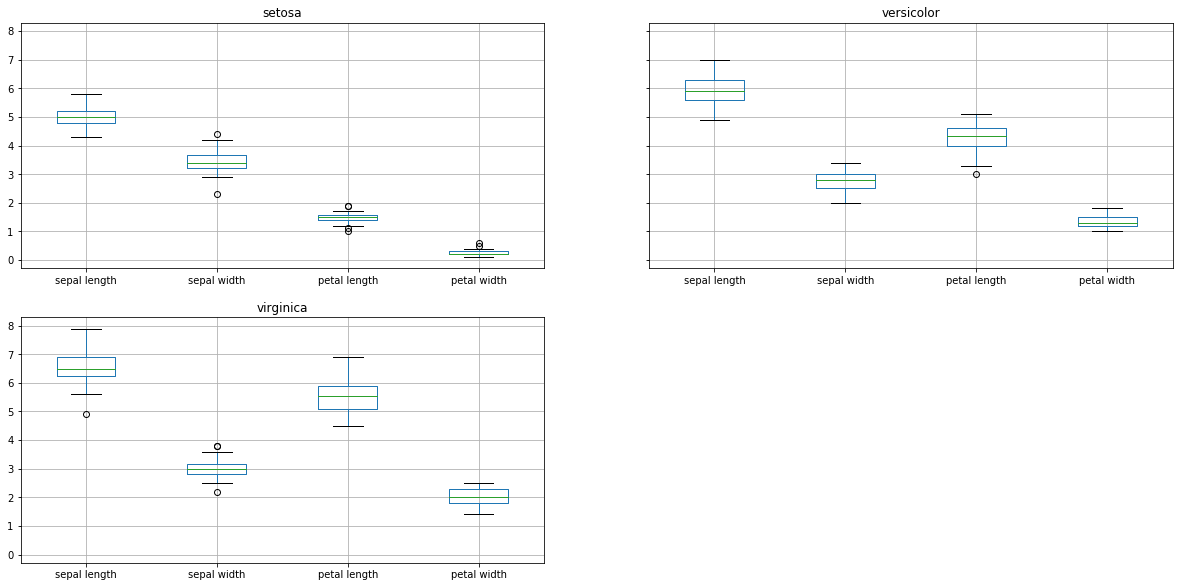

In [220]:
df.groupby('class').boxplot(column = ['sepal length', 'sepal width', 'petal length' ,'petal width'], figsize = (20,10))

ALTERNATIVE : idem sauf qu'on affiche les caractéristiques des 3 espèces sur le même graphe (comparaison par variable). Ici le GROUP BY s'effectue dans le boxplot( ).

sepal length    {'whiskers': [Line2D(_line1), Line2D(_line2), ...
sepal width     {'whiskers': [Line2D(_line1), Line2D(_line2), ...
petal length    {'whiskers': [Line2D(_line1), Line2D(_line2), ...
petal width     {'whiskers': [Line2D(_line1), Line2D(_line2), ...
dtype: object

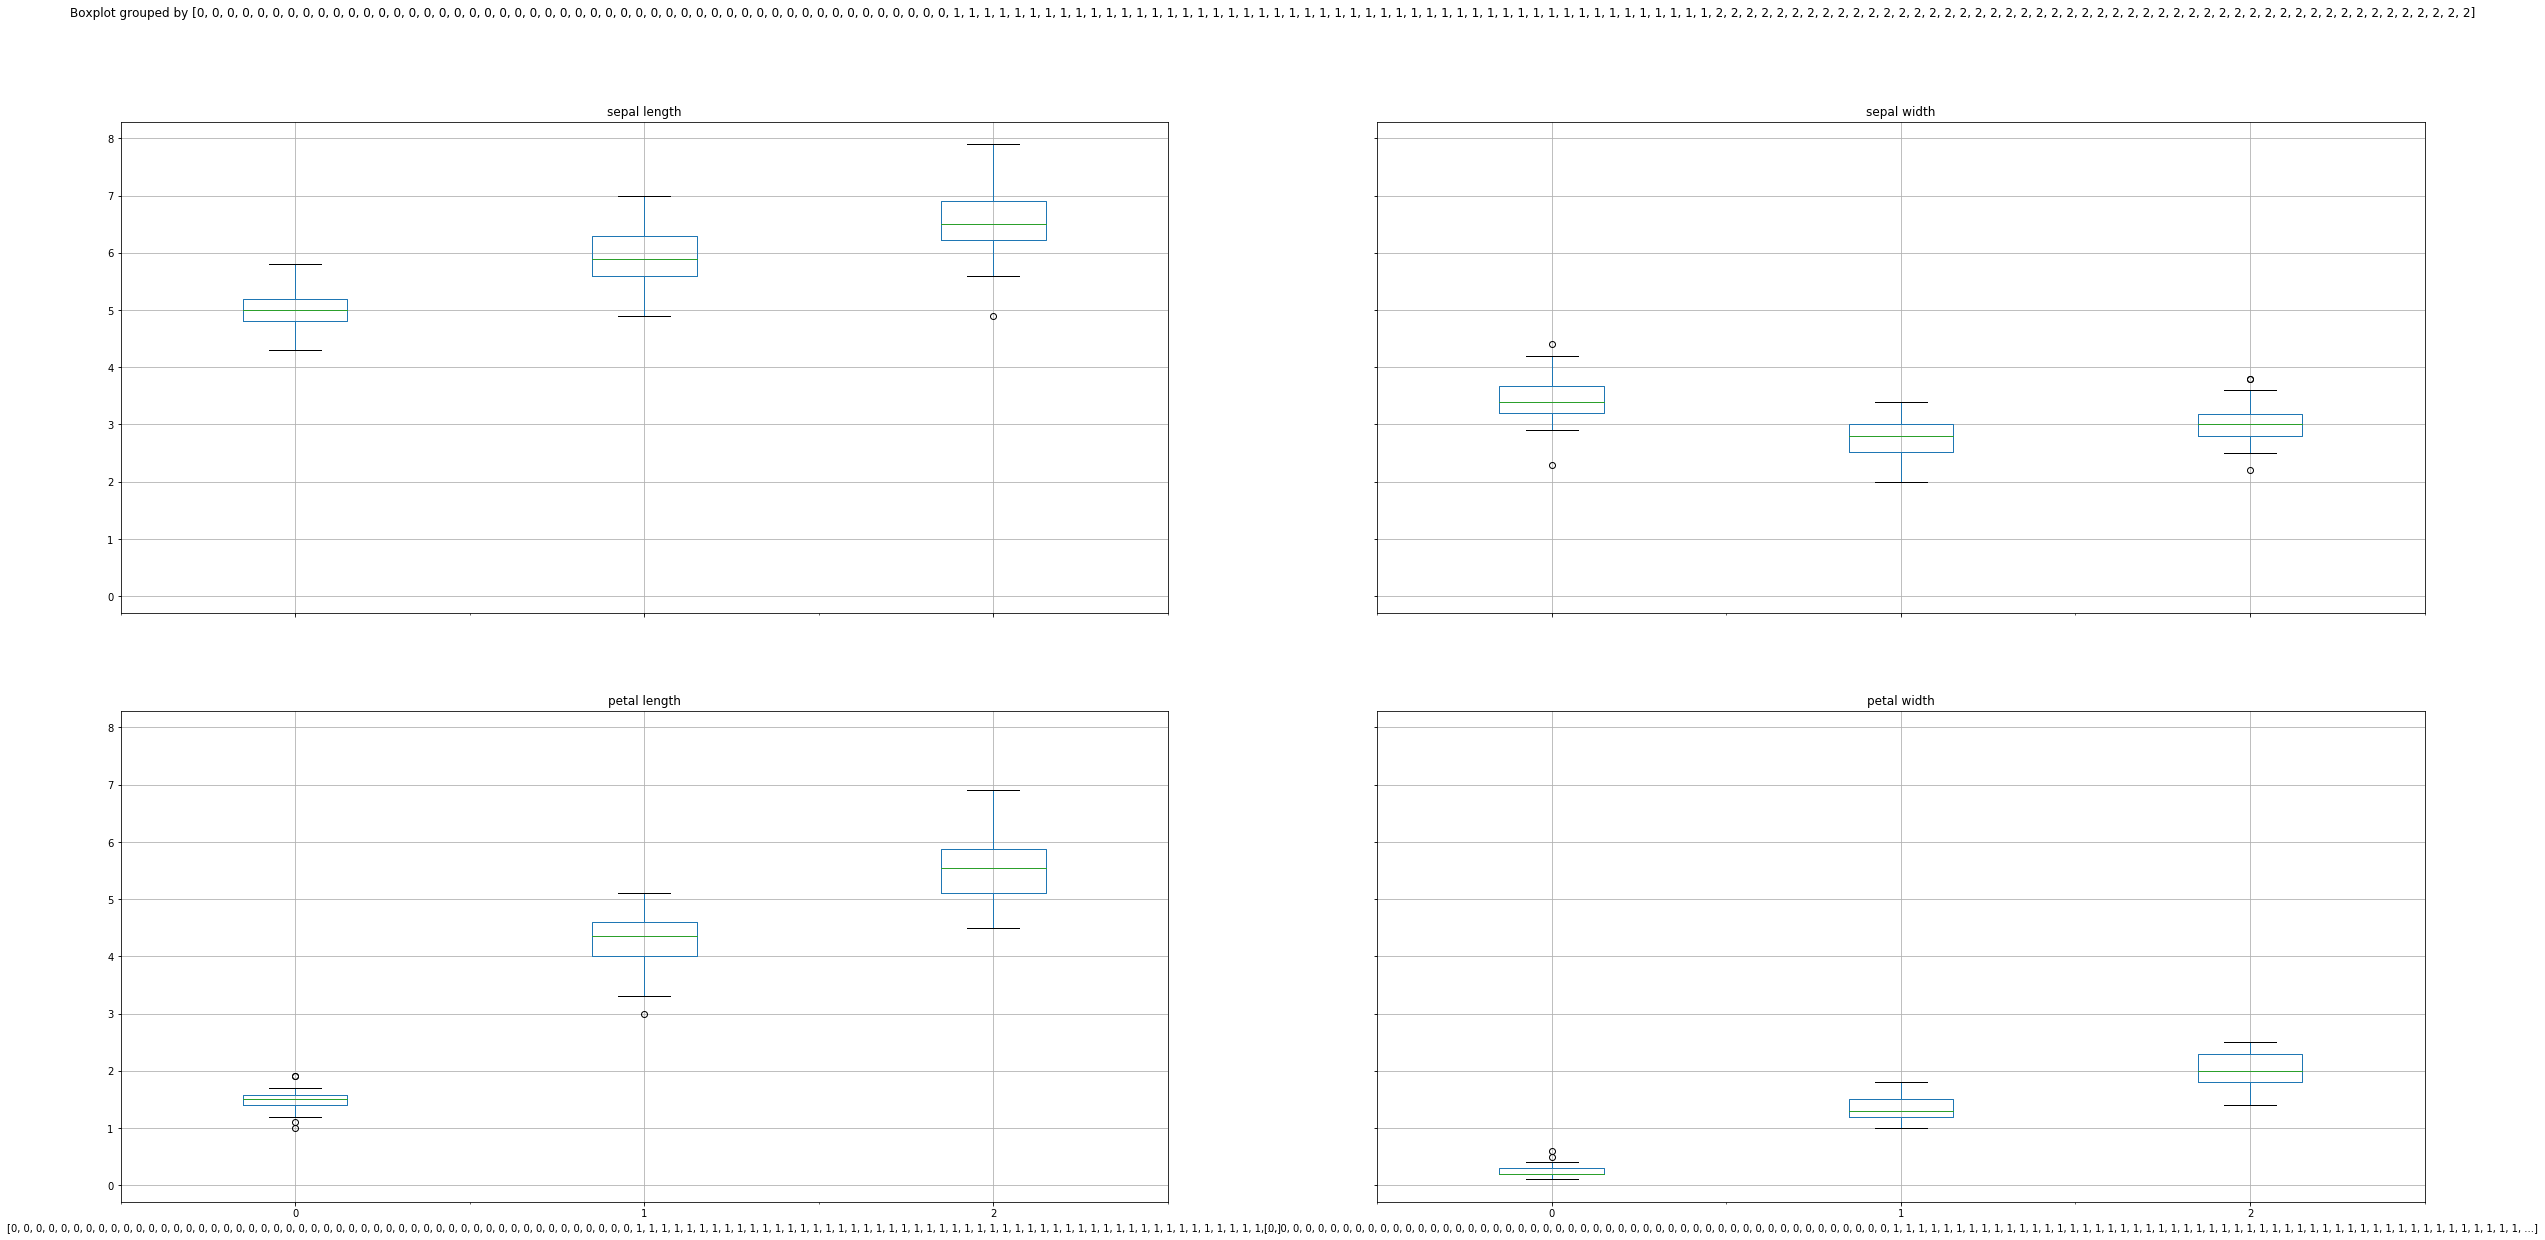

In [223]:
df.boxplot(column = ['sepal length', 'sepal width', 'petal length' ,'petal width'], by = df['species'].tolist(), figsize = (40,20), return_type = 'dict')

### 3. Détecter les valeurs NaN

On cherche souvent à se débarasser de ces valeurs car elles empêchent les fonctions de s'exécuter normalement.

In [264]:
ex = pd.DataFrame(np.array([[np.nan, 1, 3], [4, 5, np.nan], [6, 7, 8], [np.nan, 2, 3]]), columns = ['x', 'y','z'])
ex

,x,y,z
0,NaN,1.0,3.0
1,4.0,5.0,NaN
2,6.0,7.0,8.0
3,NaN,2.0,3.0


On regarde si les colonnes contiennent des valeurs NaN :

In [265]:
ex.isnull().any()

x     True
y    False
z     True
dtype: bool

Le but est de remplacer ces valeurs pour pouvoir traiter l'ensemble des données ultérieurement :

In [266]:
ex['x'] = ex['x'].fillna(2) # On remplace les Nan par la valeur 2 dans la colonne x
ex

,x,y,z
0,2.0,1.0,3.0
1,4.0,5.0,NaN
2,6.0,7.0,8.0
3,2.0,2.0,3.0


On peut aussi les remplacer par une fonction donnée :

In [268]:
# On remplace les NaN de la colonne z par la valeur la plus représentée dans z
ex['z'] = ex['z'].replace(np.nan, ex['z'].mode()[0])
ex

,x,y,z
0,2.0,1.0,3.0
1,4.0,5.0,3.0
2,6.0,7.0,8.0
3,2.0,2.0,3.0


### PARTIE II : Familiarisation avec quelques méthodes du package *scikit-learn*

Ce package intègre de nombreuses méthodes de classification supervisée et non-supervisée, ce qui peut s'avèrer très utile pour faire de la prédiction ou de la détection d'anomalies.

Pour introduire le concept de Machine Learning sans trop rentrer dans les détails, nous allons essayer de prédire à quelle espèce appartiennent les iris en fonction de leurs caractéristiques principales.

### Exemple : K-Nearest Neighbors

Cette méthode supervisée est expliquée très simplement ici : https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

On reprend le dataframe des iris crée précédemment, puis on sépare notre jeu de données en jeu d'entraînement et jeu de test.

L'utilité primordiale de ce principe est expliqué ici : https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [279]:
X_train, X_test, y_train, y_test = train_test_split(
df.iloc[:,0:4], df['species'], test_size=0.3, random_state=42)

In [300]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # entraîne le modèle

y_pred = knn.predict(X_test) # prédit les classes du jeu de test

In [302]:
recap = pd.DataFrame()
recap['test'] = y_test
recap['pred'] = y_pred
recap

,test,pred
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


On évalue le score de nos prédictions avec plusieurs mesures :
- Le rappel : Pourcentage de bonnes prédictions ?
- La précision : Pourcentage de prédictions justes ?
- Le F-score : Moyenne des 2 précédents

Explication ci-joint : http://www.datasciencesmachinelearning.com/2018/11/confusion-matrix-accuracy-precision.html

In [297]:
print('Rappel :',recall_score(y_test, y_pred, average = 'weighted'))
print('Précision :',accuracy_score(y_test, y_pred))
print('F-score :',f1_score(y_test, y_pred, average = 'weighted'))

Rappel : 1.0
Précision : 1.0
F-score : 1.0


A priori, ici toutes nos prédictions sont justes. Mais cela provient du fait que le jeu de données est vraiment petit (150 iris seulement) et que les espèces à prédire ont une inertie inter-classe relativement élevée.

Sur de grands jeux de données, il est très difficile d'obtenir un F-score de 1, sinon on parle généralement d'over-training (gros fléau des data scientists !)

### PARTIE 3 : A vous de jouer !

Libre à vous de découvrir et vous entraîner sur d'autres modèles de classification supervisée.

Ci-joint un jeu de données amusant qui vous permettra de mettre en pratique tout cela et de déterminer qui survivra au naufrage du Titanic !

In [324]:
df = pd.read_csv('/Users/mawps/Documents/Machine Learning/titanic.csv') # Remplacer par le bon chemin !
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Conseil : commencez par construire un dataframe éliminant les valeurs inutiles, puis remplacer les valeurs qualitatives restantes par des valeurs numériques.

In [325]:
df = df.drop('Cabin',1) # 1 pour supprimer une colonne, 0 pour une ligne
df = df.drop('Name',1)
df = df.drop('Ticket',1)
df = df.drop('PassengerId',1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [326]:
df = pd.get_dummies(df, columns=['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,NaN,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


Reste seulement à :
- Se débarasser des valeurs NaN (ici on pourra les remplacer par la moyenne de chaque colonne)
- Faire un split train/test sur votre jeu de données
- A faire les prédictions de la colonne Survived avec la méthode de classification (supervisée !) de votre choix
- Calculer les scores entre le test et la prédiction.

Bonne chance et bonnes vacances !